**Emmanuel Decena - ME EE**

**Foundations of Machine Learning**

Assignment 1 - Positional Encoding

**1. Generate a 16×16 − dim position encoding using an interweaved sin T and cos T functions:𝐵= 𝒃!,𝒃,,...,𝒃!- !- where 𝒃 ∈ R . Distribute the the domain of 16-dim between 0 to 2𝜋.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

In [31]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
pos_encoding.shape

(1, 16, 16)

**2. If 𝐵 is a set of basis vectors, are the vectors orthogonal? Orthonomal? If not, make the basis vectors orthogonal and orthonormal using G-S method.**

**Checking if orthogonal and orthonormal**

In [32]:
#Orthogonal matrix multiplied by transpose of itself must return identity matrix
pos_encoding[0].dot(pos_encoding[0].T)

array([[8.        , 7.48516624, 6.36827662, 5.54310106, 5.5596768 ,
        6.13703996, 6.44476412, 5.89218599, 4.69719104, 3.70911136,
        3.64630919, 4.44763429, 5.33290184, 5.51643254, 4.91807334,
        4.21918798],
       [7.48516624, 8.        , 7.48516624, 6.36827662, 5.54310106,
        5.5596768 , 6.13703996, 6.44476412, 5.89218599, 4.69719104,
        3.70911136, 3.64630919, 4.44763429, 5.33290184, 5.51643254,
        4.91807334],
       [6.36827662, 7.48516624, 8.        , 7.48516624, 6.36827662,
        5.54310106, 5.5596768 , 6.13703996, 6.44476412, 5.89218599,
        4.69719104, 3.70911136, 3.64630919, 4.44763429, 5.33290184,
        5.51643254],
       [5.54310106, 6.36827662, 7.48516624, 8.        , 7.48516624,
        6.36827662, 5.54310106, 5.5596768 , 6.13703996, 6.44476412,
        5.89218599, 4.69719104, 3.70911136, 3.64630919, 4.44763429,
        5.33290184],
       [5.5596768 , 5.54310106, 6.36827662, 7.48516624, 8.        ,
        7.48516624, 6.36827662, 

**Applying GS**

In [33]:
q, r = np.linalg.qr(pos_encoding[0])

In [34]:
norm_pos_encoding = q
norm_pos_encoding

array([[ 0.        , -0.35075008, -0.03035764, -0.35102805, -0.27714595,
         0.51756466, -0.47057115, -0.37349839, -0.18461136,  0.10350272,
        -0.04406293,  0.02045177,  0.00470124,  0.00437847, -0.00092754,
        -0.00383091],
       [-0.29995127, -0.19368307, -0.16973745, -0.25463363, -0.21054296,
         0.26525884,  0.09625185,  0.4663709 ,  0.46256966, -0.38541339,
         0.2289655 , -0.13531751, -0.04223897, -0.03831873,  0.00593137,
         0.02953571],
       [-0.32412872,  0.14145526, -0.24418655, -0.19101844, -0.21497824,
         0.12620503,  0.3302561 ,  0.24327287, -0.14580843,  0.40490187,
        -0.4227021 ,  0.35626594,  0.16711674,  0.14641878, -0.01266348,
        -0.0899266 ],
       [-0.05030373,  0.34654028, -0.26734508, -0.15663699, -0.28609975,
         0.00699994,  0.27979662, -0.15884272, -0.32278168,  0.10027847,
         0.22378177, -0.42385208, -0.37538634, -0.3142826 ,  0.00248482,
         0.11083467],
       [ 0.26977028,  0.23301776, -0

In [35]:
norm_pos_encoding.dot(norm_pos_encoding.T)

array([[ 1.00000000e+00,  9.60555149e-17,  1.87073629e-16,
         1.06954945e-16, -4.42839695e-17,  1.79338462e-16,
        -8.56505813e-17, -7.72466827e-18,  3.65801758e-17,
        -7.12822567e-17, -6.19262555e-17, -1.35632355e-16,
        -2.04836244e-17,  8.67738294e-17, -5.26209113e-17,
        -2.79936954e-17],
       [ 9.60555149e-17,  1.00000000e+00, -7.61466234e-17,
        -1.71231336e-17, -5.30235549e-17,  8.43181014e-17,
        -1.32798958e-16,  7.27854973e-17, -1.43618145e-16,
        -2.67535241e-16, -5.88201663e-17, -5.18475422e-17,
         1.95662314e-17, -1.16312681e-16,  2.31460056e-16,
         6.48324495e-17],
       [ 1.87073629e-16, -7.61466234e-17,  1.00000000e+00,
         3.47627843e-17, -2.01018756e-16, -8.87809000e-17,
        -2.42946553e-16, -7.37103249e-17, -1.03925851e-16,
         1.58196721e-16, -8.87194130e-17, -7.22715259e-17,
        -5.55051336e-17,  1.16358364e-16,  2.22472480e-16,
         3.29619046e-16],
       [ 1.06954945e-16, -1.71231336e

**3. Generate a colored visualization of vectors in 1 and 2.**

(1, 16, 16)


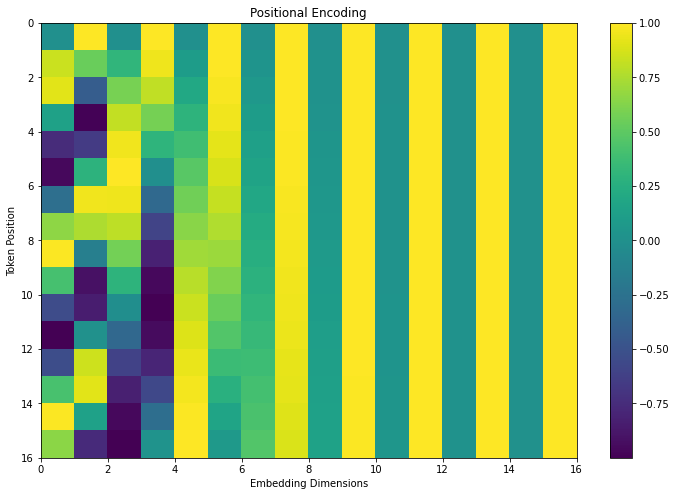

In [36]:
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.title('Positional Encoding')
plt.colorbar()
plt.show()

(16, 16)


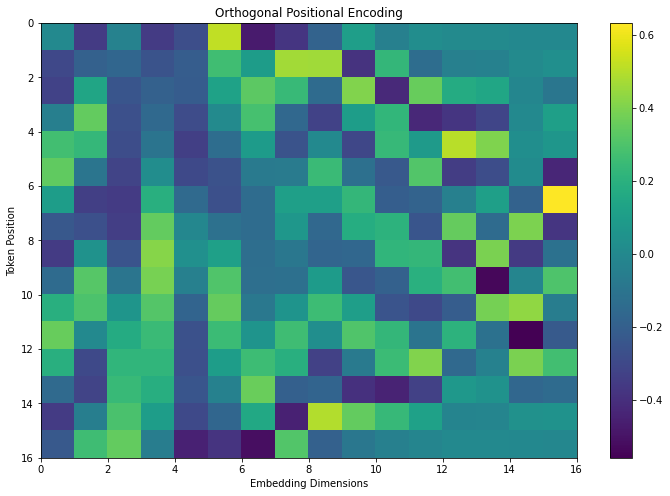

In [37]:
print (norm_pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(norm_pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.title('Orthogonal Positional Encoding')
plt.colorbar()
plt.show()